# 라이브러리 & 파일 로드

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

path = '/content/drive/MyDrive/Colab Notebooks/hidden_pattern/npy_files'
list_dir = os.listdir(path)

list_dir.sort()

In [ ]:
print(len(list_dir))

20


# 함수

In [ ]:
from sklearn.preprocessing import StandardScaler

def plot_char(count,name,xl):
  plt.figure(figsize=(20,10))
  plt.xlabel("5 sec bins",fontsize = 15)
  plt.ylabel("# of characters",fontsize = 15)
  plt.title(name,fontsize = 15)
  plt.ylim((0,50))
  plt.xlim((0,xl))
  plt.plot(np.arange(len(count)),count)
  plt.hlines(np.mean(count),0,len(count),colors='r')
  plt.show()

def smoothed_plot(count,name,xl,sig = 5):
  smoothed_data = gaussian_filter1d(count, sigma=sig)

  plt.figure(figsize=(15, 5))
  plt.plot(count, alpha=0.6, label="Original")
  plt.plot(smoothed_data, color="red", linewidth=2, label="Smoothed (Gaussian)")
  plt.axhline(y=count.mean(), color="blue", linestyle="--", label="Mean")
  plt.title(name, fontsize = 20)
  plt.xlabel("5 sec bins", fontsize = 20)
  plt.ylabel("# of Characters", fontsize = 20)
  plt.legend()
  plt.show()

# 기본적인 통계량들

In [ ]:
cols = []
mean = []
std = []
min = []
max = []
zero = []
vel = []
for k in list_dir:
  count = np.load(path+'/'+k)
  cols.append(k[:4])
  mean.append(np.mean(count))
  std.append(np.std(count))
  min.append(np.min(count))
  max.append(np.max(count))
  zero.append(len(np.where(count==0)[0]))
  vel.append(sum(count)/(5*len(count)))

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=cols)
df.loc[0] = mean
df.loc[1] = std
df.loc[2] = max
df.loc[3] = zero
df.loc[4] = vel
df = round(df,2)
df.index=['mean','std','max','zero','vel']
df

ch_1   ch_2   hs_1   hs_2   hw_1   hw_2    jh_1    jh_2    jk_1  \
mean  21.02  20.62  22.65  21.62  21.33  21.98   13.17   14.06   12.57   
std    7.89   8.30   6.94   7.45   7.69   7.16   10.18   10.05    9.27   
max   37.00  40.00  47.00  40.00  39.00  40.00   38.00   38.00   36.00   
zero  20.00  24.00   7.00  14.00  13.00   4.00  139.00  145.00  144.00   
vel    4.20   4.12   4.53   4.32   4.27   4.40    2.63    2.81    2.51   

        jk_2   js_1   js_2   sb_1   sb_2   sg_1   sg_2   sw_1   sw_2   yh_1  \
mean   14.50  26.91  25.25  18.32  18.14  24.53  26.75  22.53  24.60  15.76   
std     9.06   7.53   8.18   9.38   9.52   9.25   8.74   4.76   5.16   9.11   
max    41.00  44.00  51.00  39.00  38.00  47.00  51.00  38.00  37.00  40.00   
zero  125.00   6.00   3.00  90.00  90.00  33.00  15.00   4.00   6.00  85.00   
vel     2.90   5.38   5.05   3.66   3.63   4.91   5.35   4.51   4.92   3.15   

        yh_2  
mean   12.91  
std     8.67  
max    36.00  
zero  145.00  
vel     2.58

In [ ]:
new_cols = ['CH','HS','HW','JH','JK','JS','SB','SG','SW','YH']
new_mean = []
new_std = []
new_max = []
new_zero = []
new_vel = []
for i in range(len(mean)):
  if i%2==0:
    new_mean.append((mean[i]+mean[i+1])/2)
    new_std.append((std[i]+std[i+1])/2)
    new_max.append((max[i]+max[i+1])/2)
    new_zero.append((zero[i]+zero[i+1])/2)
    new_vel.append((vel[i]+vel[i+1])/2)

new_df = pd.DataFrame(columns=new_cols)
new_df.loc[0] = new_mean
new_df.loc[1] = new_std
new_df.loc[2] = new_max
new_df.loc[3] = new_zero
new_df.loc[4] = new_vel
new_df.index=['mean','std','max','zero','vel']
round(new_df,2)

CH     HS     HW      JH      JK     JS     SB     SG     SW      YH
mean  20.82  22.13  21.65   13.61   13.53  26.08  18.23  25.64  23.57   14.34
std    8.09   7.20   7.42   10.12    9.16   7.86   9.45   9.00   4.96    8.89
max   38.50  43.50  39.50   38.00   38.50  47.50  38.50  49.00  37.50   38.00
zero  22.00  10.50   8.50  142.00  134.50   4.50  90.00  24.00   5.00  115.00
vel    4.16   4.43   4.33    2.72    2.71   5.22   3.65   5.13   4.71    2.87

In [ ]:
# 전체 평균
tot_mean = np.mean(new_mean)
tot_std = np.mean(new_std)
tot_max = np.mean(new_max)
tot_zero = np.mean(new_zero)
tot_vel = np.mean(new_vel)

print('평균:',round(tot_mean,2))
print('표준편차:',round(tot_std,2))
print('최댓값:',round(tot_max,2))
print('0 개수:',round(tot_zero,2))
print('평균 속도:',round(tot_vel,2))

평균: 19.96
표준편차: 8.21
최댓값: 40.85
0 개수: 55.6
평균 속도: 3.99


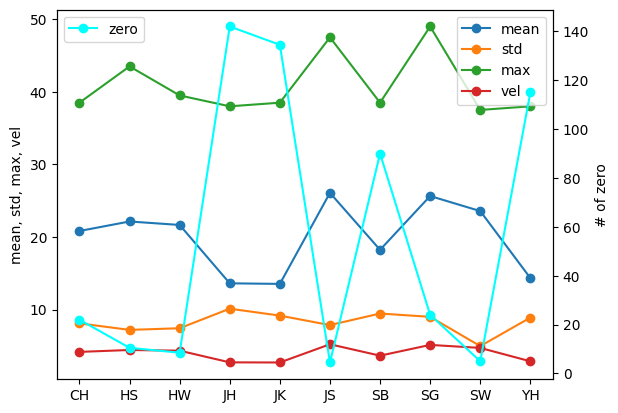

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(new_mean,label='mean',marker='o')
ax1.plot(new_std,label='std',marker='o')
ax1.plot(new_max,label='max',marker='o')
ax2 = ax1.twinx()
ax2.plot(new_zero,label='zero',c = 'cyan',marker='o')
ax1.plot(new_vel,label='vel',marker='o')
ax1.set_xticks(range(len(new_cols)),new_cols)
ax1.set_ylabel('mean, std, max, vel')
ax2.set_ylabel('# of zero')
ax1.legend()
ax2.legend(loc='upper left')
plt.show()

# Plot

- 스무딩하니까 특성이 좀 잘 보이더라. 주기성이
- 파형이랑 같이 해서, 글자수가 많아지는 포인트에 데시벨이 커진다던지 하는 경향성이 있는지 보면 재밌을 것 같다.

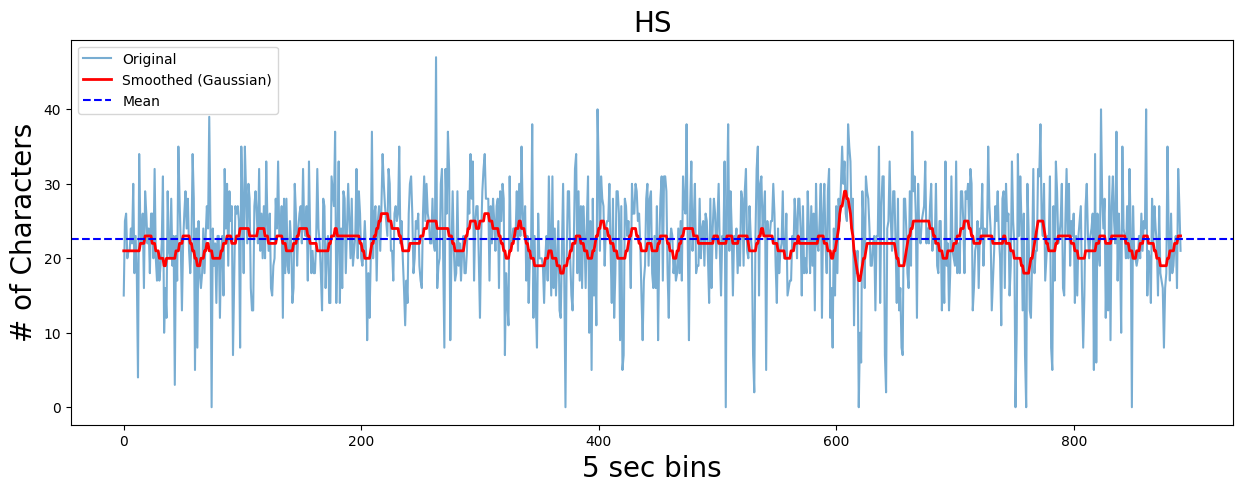

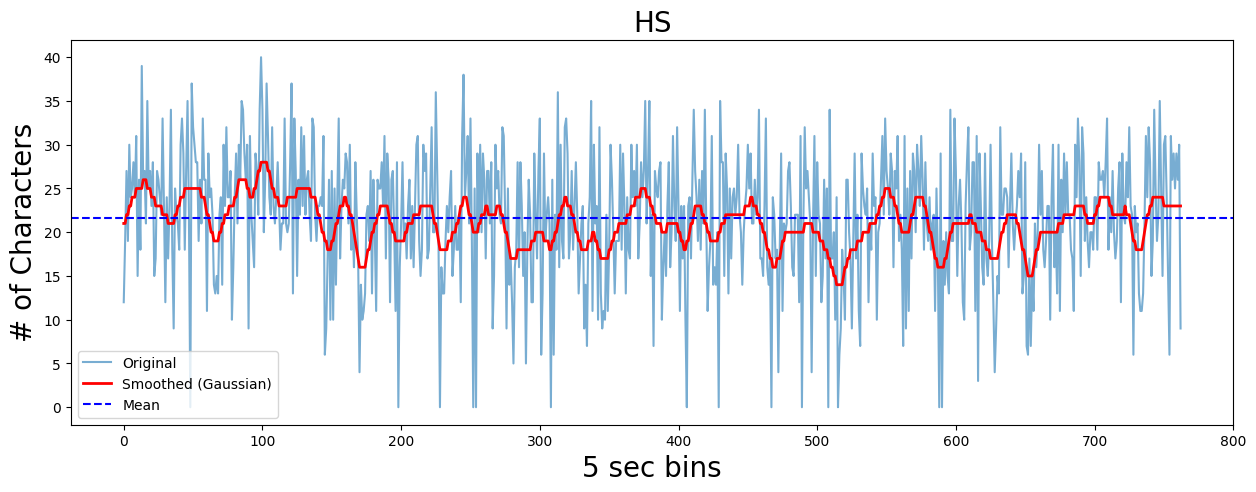

In [ ]:
hs_1 = np.load(path+'/hs_1_total_char.npy')
hs_2 = np.load(path+'/hs_2_total_char.npy')

smoothed_plot(hs_1,'HS',len(hs_1),4)
smoothed_plot(hs_2,'HS',len(hs_2),4)

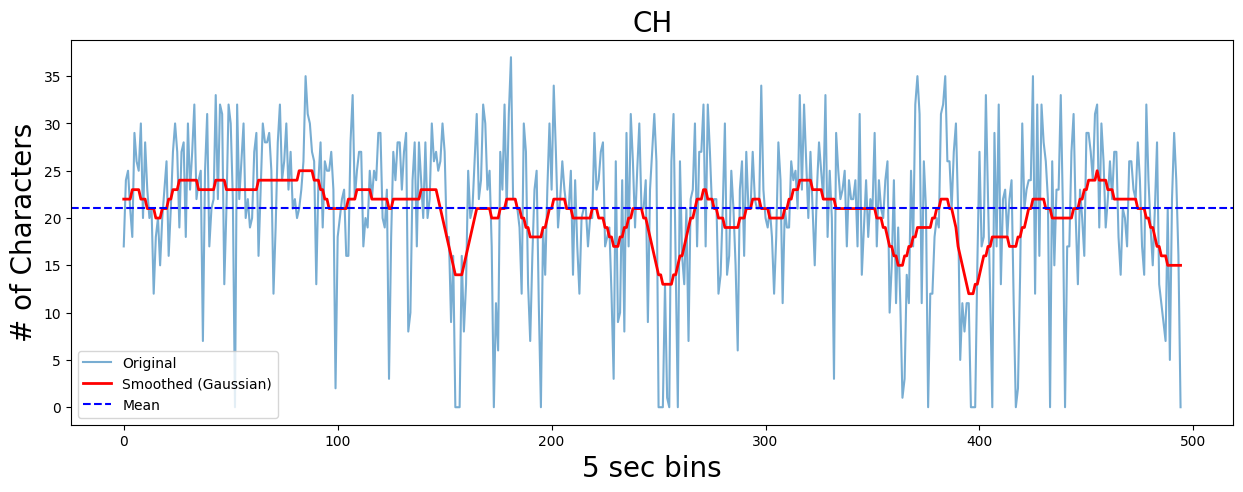

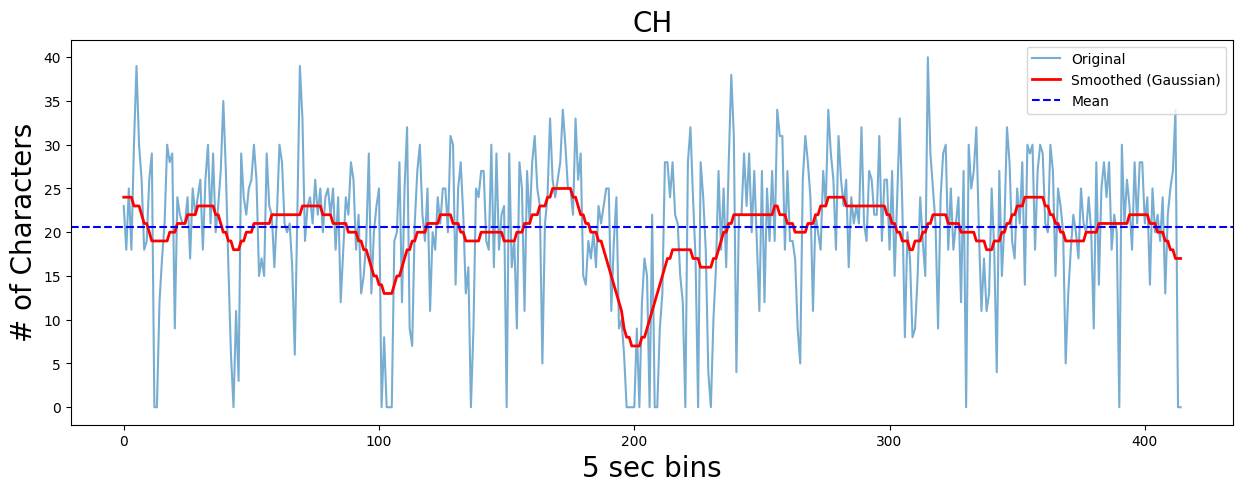

In [ ]:
ch_1 = np.load(path+'/ch_1_total_char.npy')
ch_2 = np.load(path+'/ch_2_total_char.npy')

smoothed_plot(ch_1,"CH",len(ch_1))
smoothed_plot(ch_2,"CH",len(ch_2))

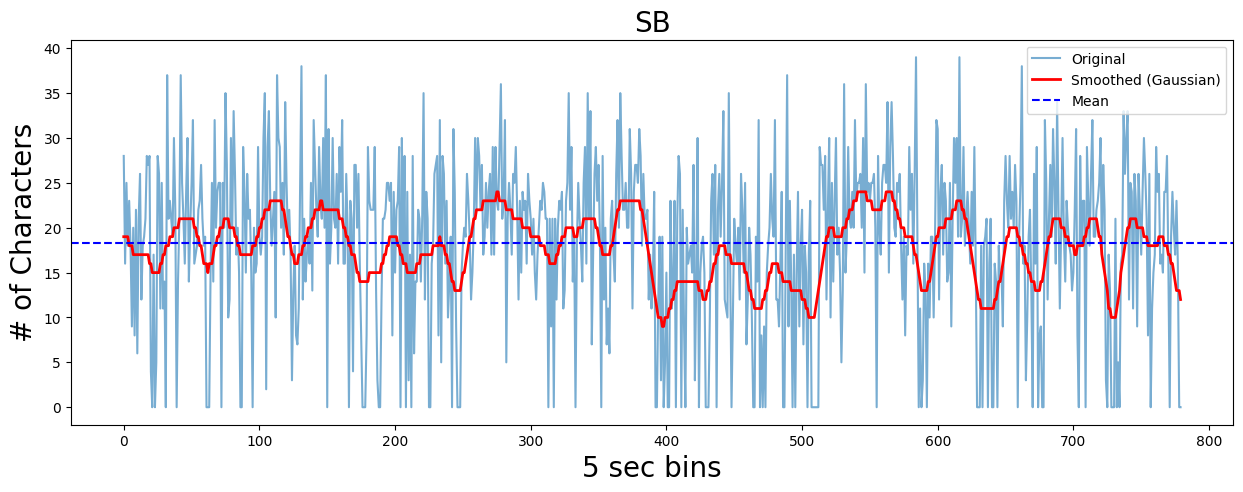

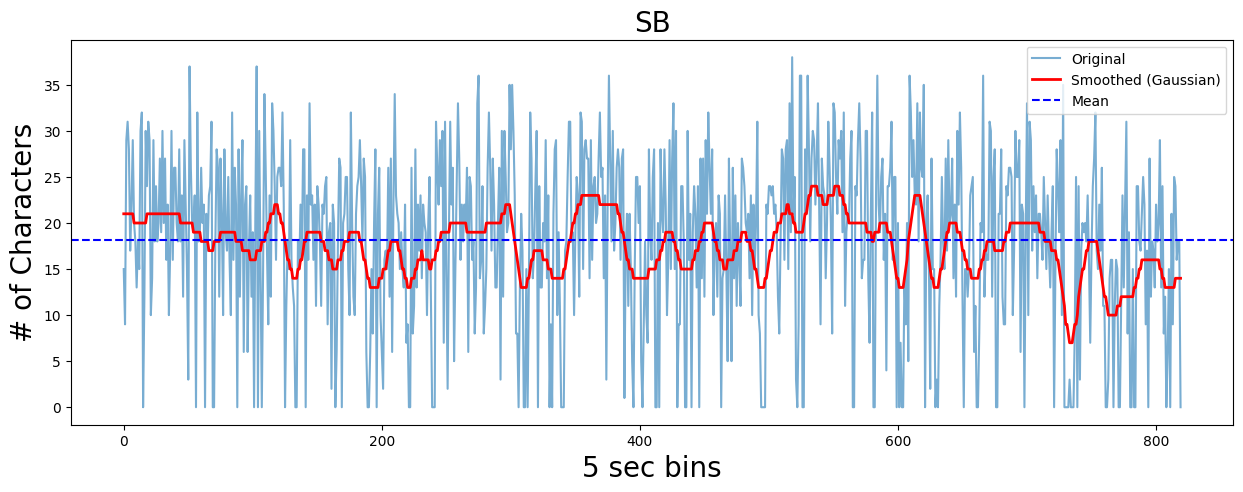

In [ ]:
sb_1 = np.load(path+'/sb_1_total_char.npy')
sb_2 = np.load(path+'/sb_2_total_char.npy')

smoothed_plot(sb_1,"SB",len(sb_1))
smoothed_plot(sb_2,"SB",len(sb_2))

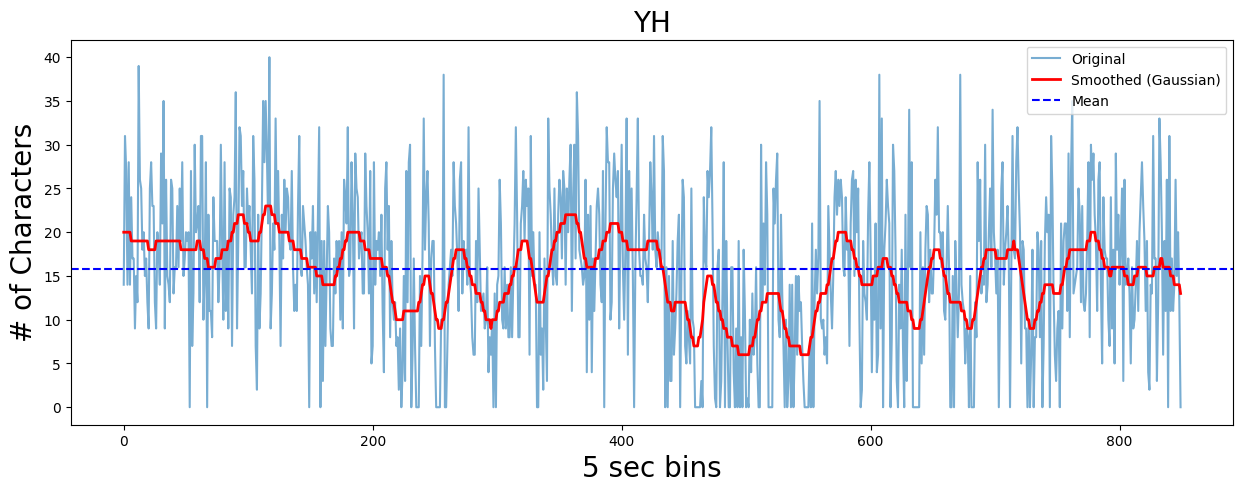

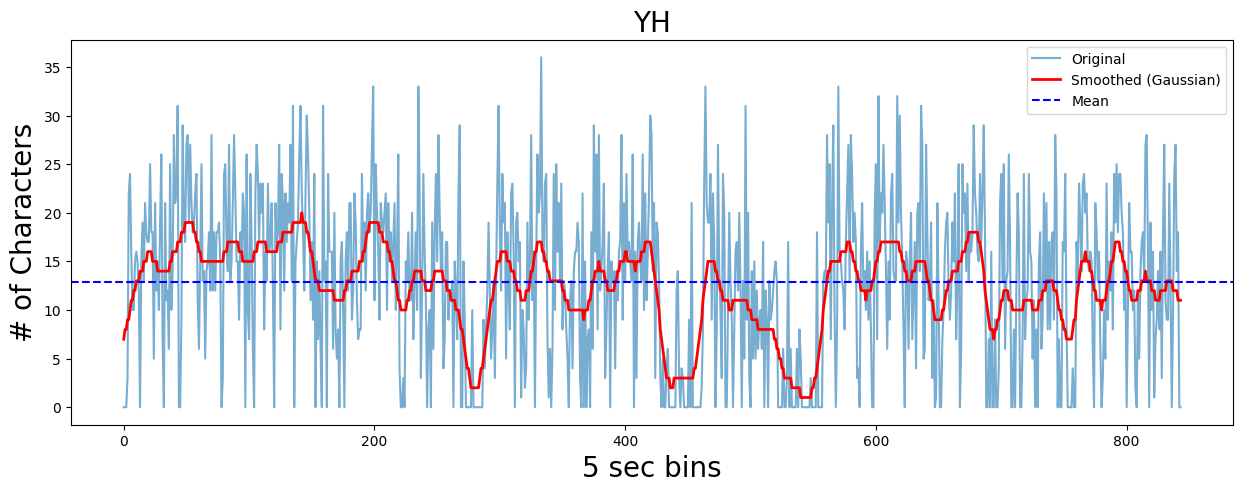

In [ ]:
yh_1 = np.load(path+'/yh_1_total_char.npy')
yh_2 = np.load(path+'/yh_2_total_char.npy')

smoothed_plot(yh_1,"YH",len(yh_1))
smoothed_plot(yh_2,"YH",len(yh_2))

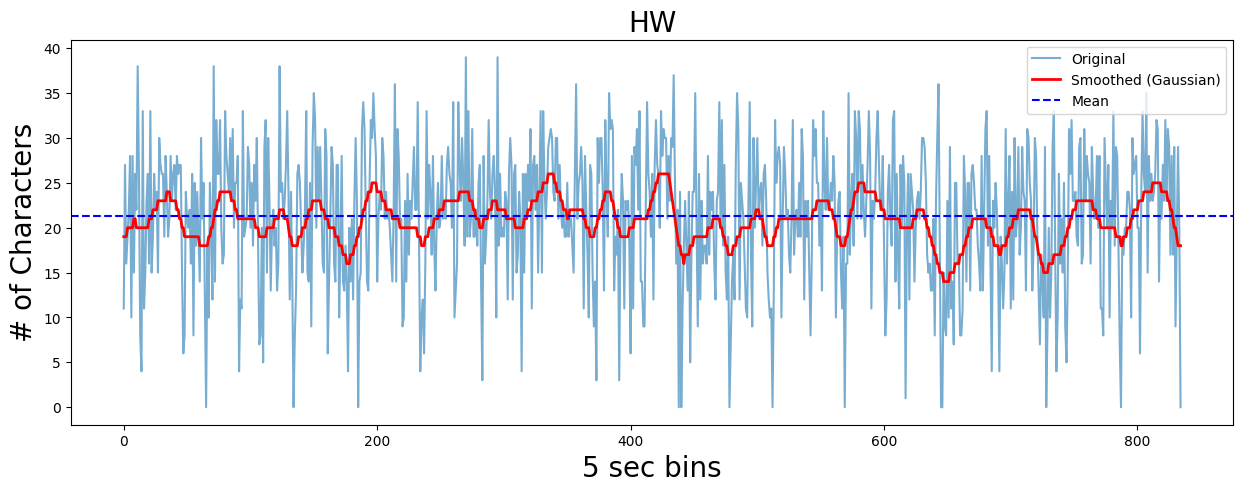

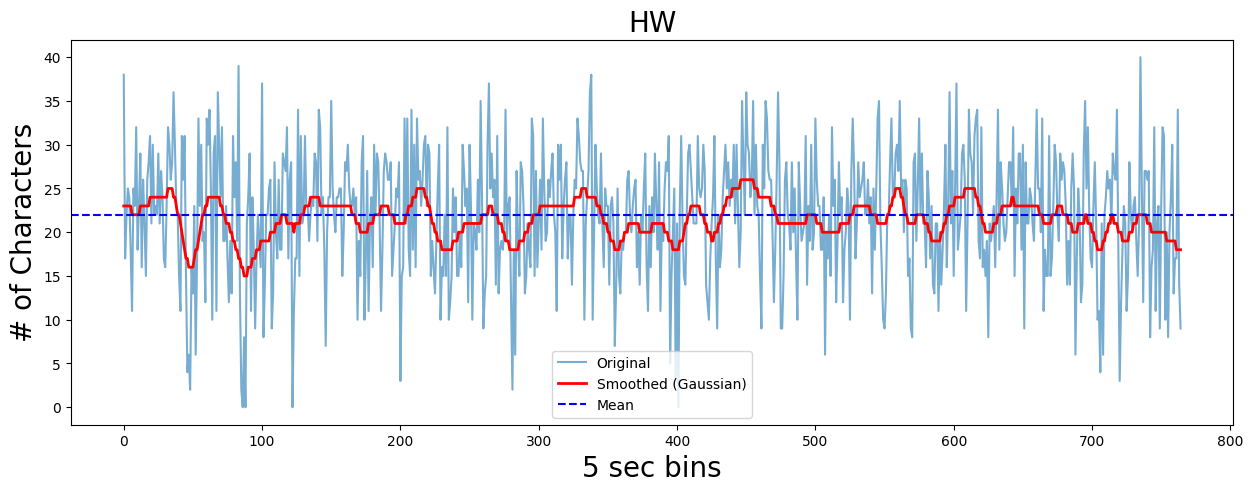

In [ ]:
hw_1 = np.load(path+'/hw_1_total_char.npy')
hw_2 = np.load(path+'/hw_2_total_char.npy')

smoothed_plot(hw_1,"HW",len(hw_1))
smoothed_plot(hw_2,"HW",len(hw_2))

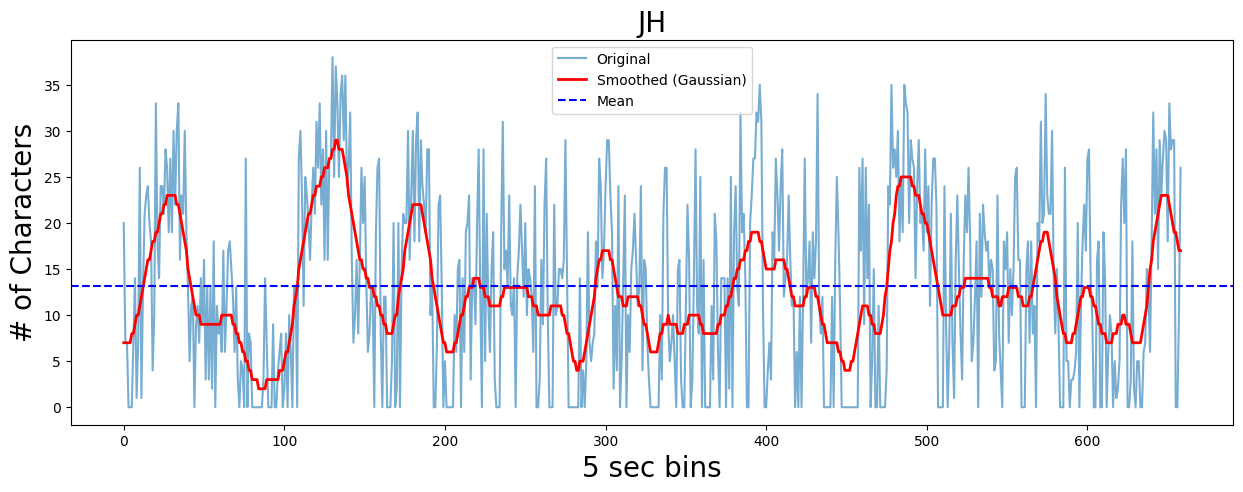

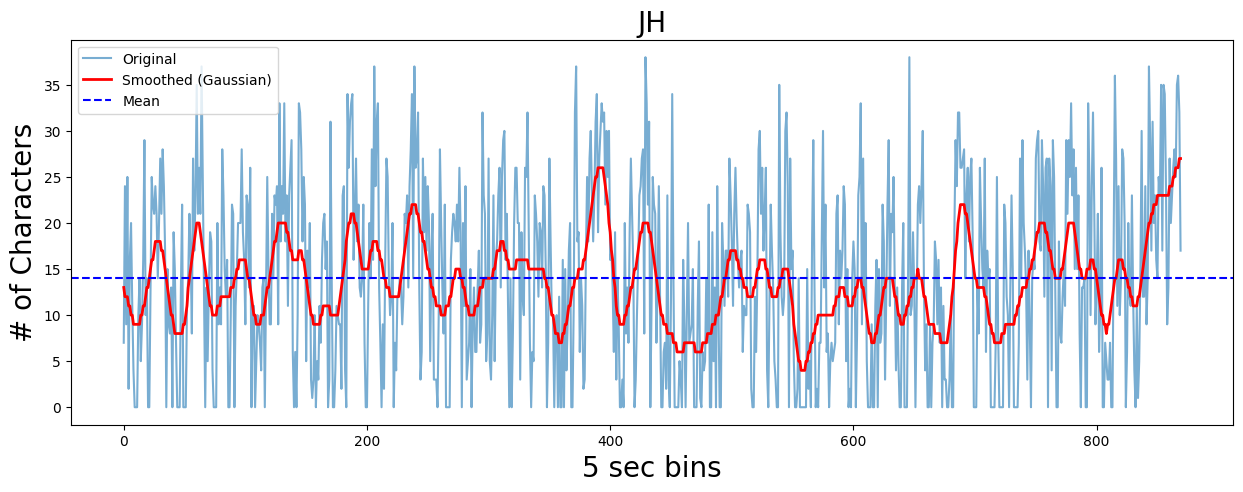

In [ ]:
jh_1 = np.load(path+'/jh_1_total_char.npy')
jh_2 = np.load(path+'/jh_2_total_char.npy')

smoothed_plot(jh_1,"JH",len(jh_1))
smoothed_plot(jh_2,"JH",len(jh_2))

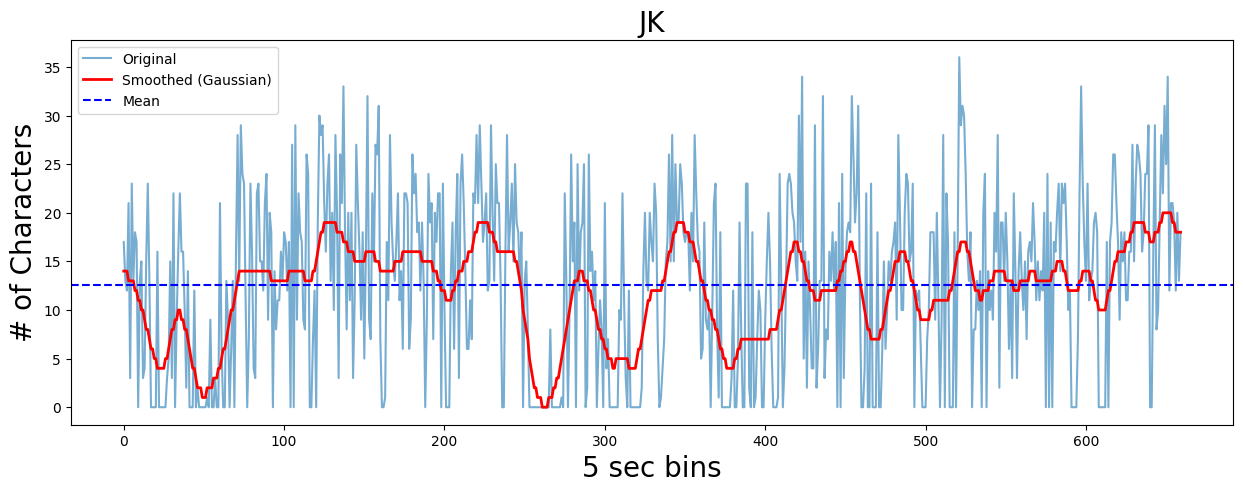

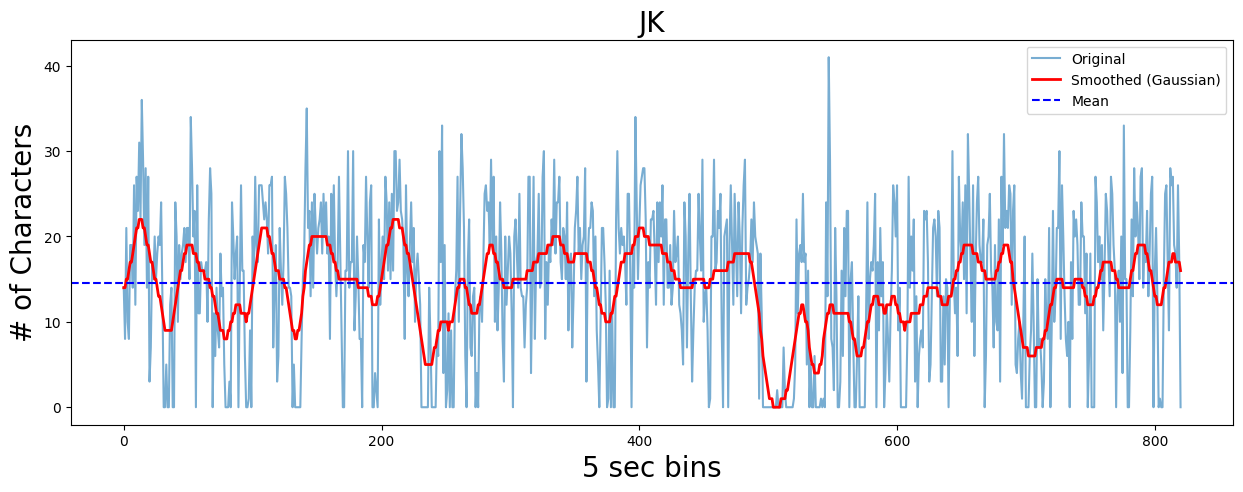

In [ ]:
jk_1 = np.load(path+'/jk_1_total_char.npy')
jk_2 = np.load(path+'/jk_2_total_char.npy')

smoothed_plot(jk_1,"JK",len(jk_1))
smoothed_plot(jk_2,"JK",len(jk_2))

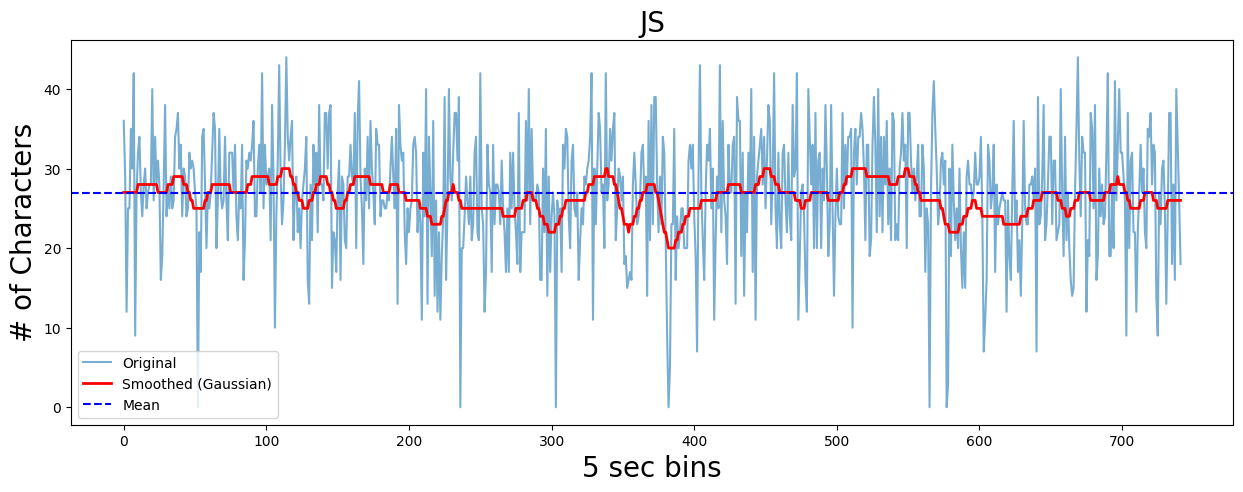

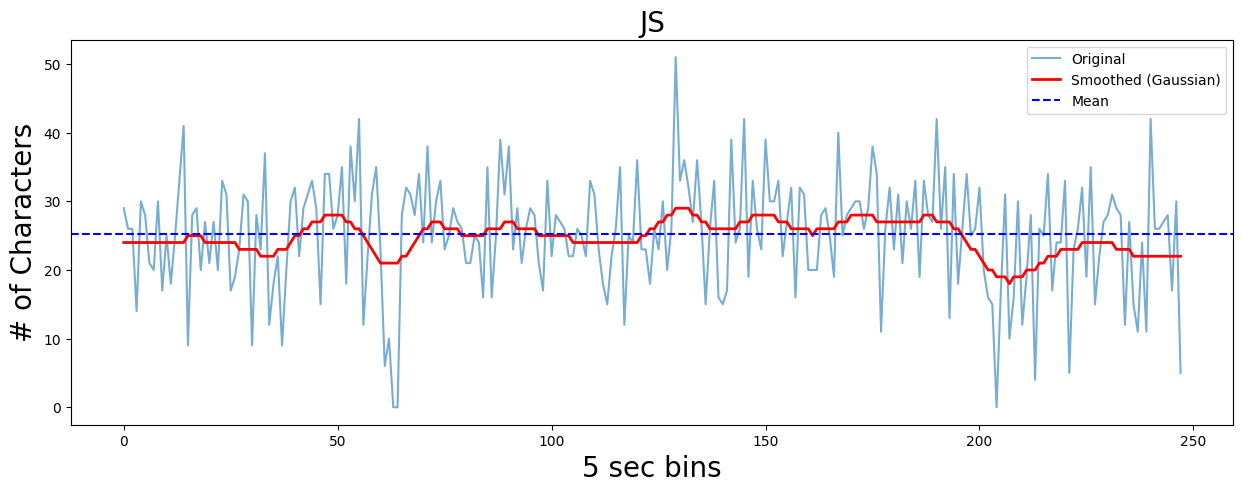

In [ ]:
js_1 = np.load(path+'/js_1_total_char.npy')
js_2 = np.load(path+'/js_2_total_char.npy')

smoothed_plot(js_1,"JS",len(js_1))
smoothed_plot(js_2,"JS",len(js_2))

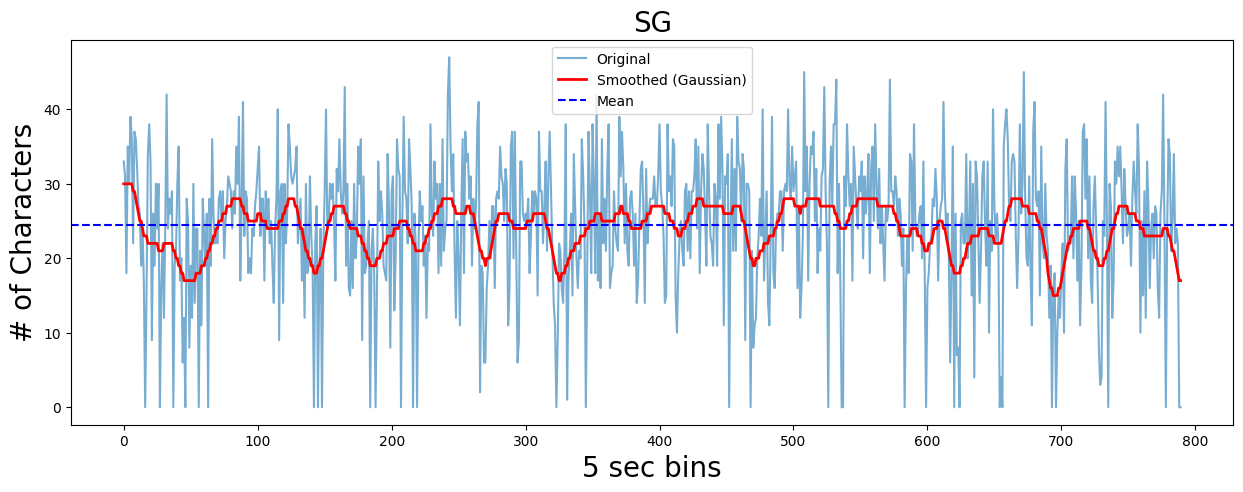

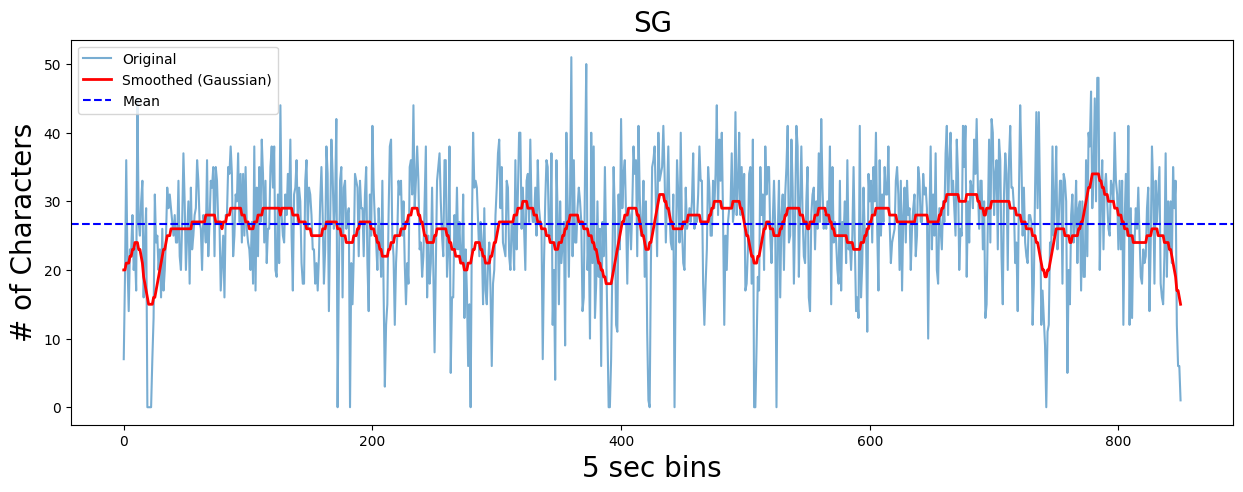

In [ ]:
sg_1 = np.load(path+'/sg_1_total_char.npy')
sg_2 = np.load(path+'/sg_2_total_char.npy')

smoothed_plot(sg_1,"SG",len(sg_1))
smoothed_plot(sg_2,"SG",len(sg_2))

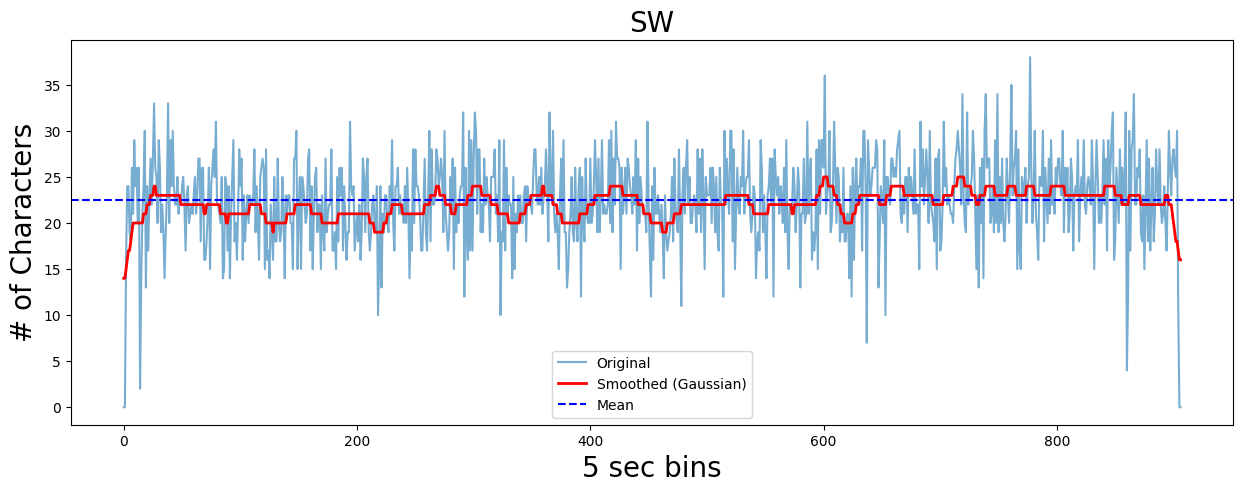

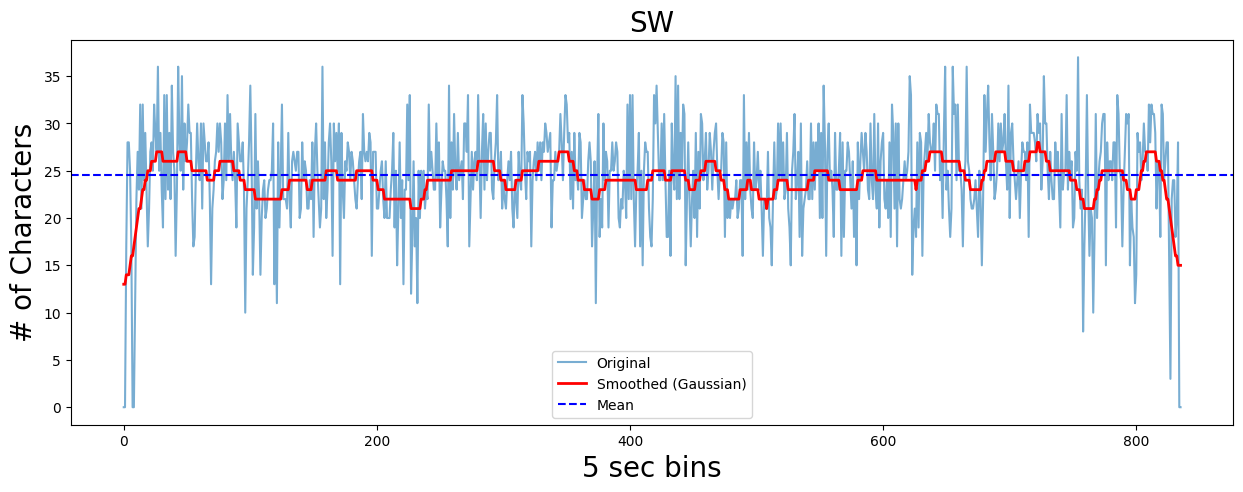

In [ ]:
sw_1 = np.load(path+'/sw_1_total_char.npy')
sw_2 = np.load(path+'/sw_2_total_char.npy')

smoothed_plot(sw_1,"SW",len(sw_1))
smoothed_plot(sw_2,"SW",len(sw_2))